In [0]:
# download Mask RCNN library
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 111.81 MiB | 10.47 MiB/s, done.
Resolving deltas: 100% (570/570), done.


In [0]:
import os

os.chdir('Mask_RCNN')

from mrcnn import utils
from mrcnn.model import MaskRCNN
from mrcnn.config import Config
from mrcnn import visualize
import urllib.request
import skimage.io
import matplotlib.pyplot as plt

os.chdir('../')

Using TensorFlow backend.


In [0]:
# create an inference class for the COCO model

class InferenceConfig(Config):

    NAME = "coco"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 80  # COCO has 80 classes

config = InferenceConfig()

In [0]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [0]:
# download pre-trained model weights (takes a minute)

url = "https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5"
urllib.request.urlretrieve(url, 'model_weights.h5')

('model_weights.h5', <http.client.HTTPMessage at 0x7fd225738978>)

In [0]:
# instantiate model and loaded weights
model = MaskRCNN(mode = "inference", model_dir = "./", config = config)
model.load_weights('model_weights.h5', by_name = True)

In [0]:
# look at model layers
model.keras_model.summary()

Model: "mask_rcnn"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, None, None, 3 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, None, None, 3 0           input_image[0][0]                
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9472        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNorm)            (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________

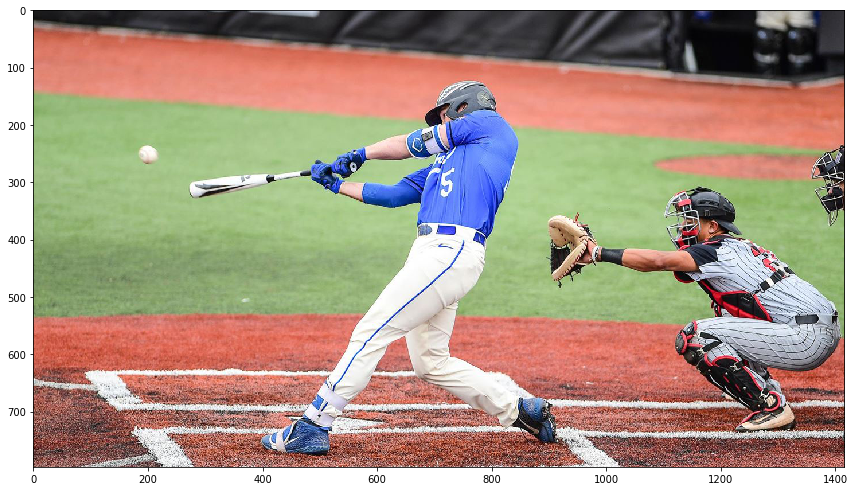

In [0]:
# Load and plot an image
# upload your image by selecting the Files tab to the left and clicking "Upload"

filename = 'baseball.jpg'

image = skimage.io.imread(filename)

plt.figure(figsize=(12,10))
skimage.io.imshow(image)

In [0]:
# get predictions
results = model.detect([image])

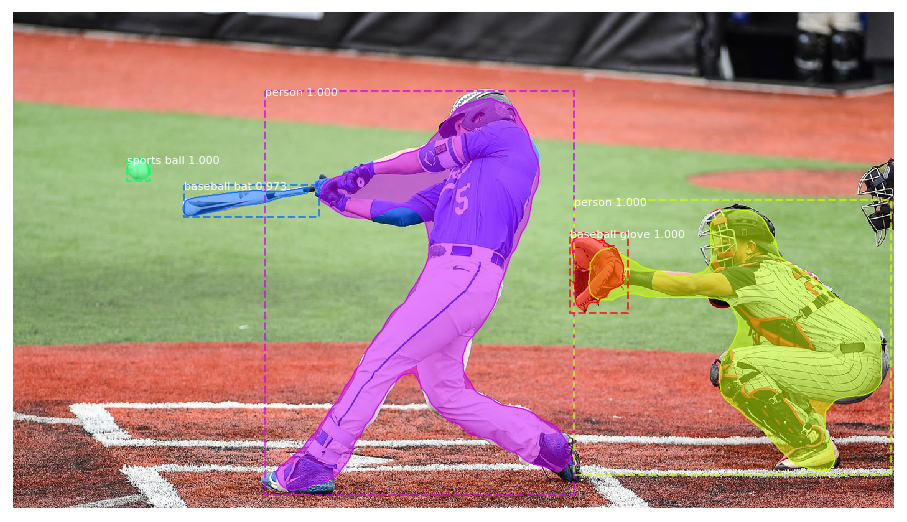

In [0]:
# Visualize results

r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])